In [ ]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2025-05-15 09:15:40.892134


In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-05-15 09:15:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.207, 142.250.153.207, 142.250.145.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  29.3MB/s    in 3.6s    

2025-05-15 09:15:44 (29.3 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak


test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/


1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in pizza_steak.
There are 2 directories and 0 images in pizza_steak/test.
There are 0 directories and 250 images in pizza_steak/test/pizza.
There are 0 directories and 250 images in pizza_steak/test/steak.
There are 2 directories and 0 images in pizza_steak/train.
There are 0 directories and 750 images in pizza_steak/train/pizza.
There are 0 directories and 750 images in pizza_steak/train/steak.


In [ ]:
!ls pizza_steak/test/pizza

1001116.jpg  1507019.jpg  2242047.jpg  2944567.jpg  3669673.jpg  556507.jpg
1032754.jpg  1512557.jpg  22489.jpg    296426.jpg   3724187.jpg  565112.jpg
103708.jpg   153195.jpg   2250611.jpg  2971095.jpg  3724353.jpg  573054.jpg
1060407.jpg  1555015.jpg  226472.jpg   2992605.jpg  3724416.jpg  614236.jpg
106507.jpg   1594097.jpg  2265512.jpg  2997525.jpg  3728155.jpg  614981.jpg
1067986.jpg  1618659.jpg  2276783.jpg  300157.jpg   3729167.jpg  61656.jpg
1106738.jpg  1636919.jpg  2296393.jpg  3042459.jpg  373847.jpg	 625434.jpg
1119571.jpg  1655630.jpg  2320458.jpg  3049449.jpg  3754474.jpg  645087.jpg
11297.jpg    1686938.jpg  2323860.jpg  3092704.jpg  3758160.jpg  648055.jpg
1152100.jpg  1687143.jpg  2343304.jpg  309892.jpg   376625.jpg	 65128.jpg
1179703.jpg  1691503.jpg  2392727.jpg  3174637.jpg  3770514.jpg  666569.jpg
1180001.jpg  1694874.jpg  2398925.jpg  321526.jpg   3784357.jpg  678708.jpg
1180273.jpg  1765727.jpg  2406842.jpg  3216107.jpg  3785667.jpg  714866.jpg
1183595.jpg  177

In [ ]:
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [ ]:
 import pathlib
 import numpy as np
 data_dir=pathlib.Path("pizza_steak/train")
 class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
 print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape:{img.shape}")
  return img

['1743389.jpg']
Image shape:(512, 512, 3)


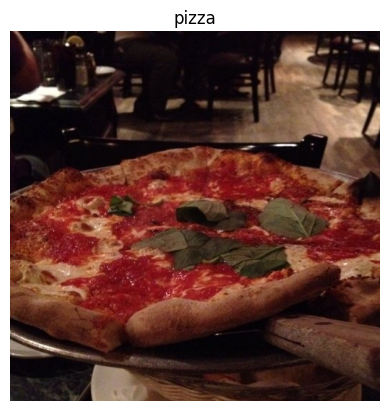

In [ ]:
img=view_random_image(target_dir="pizza_steak/train/",
                      target_class="pizza")

array([[[25,  2,  8],
        [32,  7, 11],
        [42, 16, 19],
        ...,
        [21, 12, 15],
        [19, 10, 13],
        [15,  6,  9]],

       [[25,  2,  8],
        [26,  3,  9],
        [33,  7, 10],
        ...,
        [20, 11, 14],
        [20, 11, 14],
        [17,  8, 11]],

       [[27,  6, 13],
        [27,  4, 10],
        [30,  3,  8],
        ...,
        [20, 11, 16],
        [21, 12, 17],
        [20, 11, 16]],

       ...,

       [[60, 59, 54],
        [58, 57, 52],
        [44, 43, 38],
        ...,
        [11,  6, 13],
        [12,  5, 13],
        [13,  6, 14]],

       [[57, 57, 49],
        [60, 60, 52],
        [48, 48, 40],
        ...,
        [11,  6, 13],
        [12,  7, 14],
        [12,  7, 14]],

       [[45, 45, 37],
        [54, 54, 46],
        [49, 49, 41],
        ...,
        [11,  6, 13],
        [12,  7, 14],
        [13,  8, 15]]], dtype=uint8)
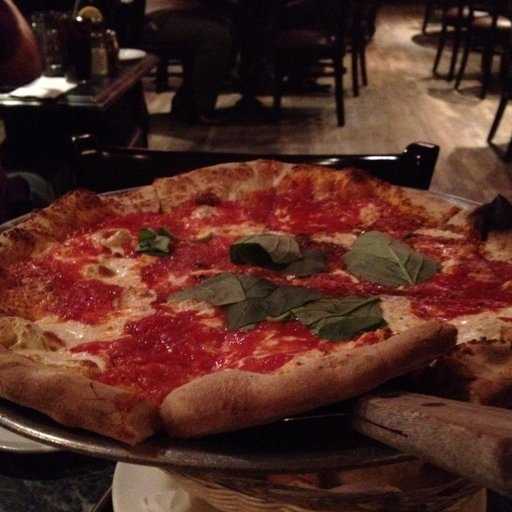

In [ ]:
img

In [ ]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[25,  2,  8],
        [32,  7, 11],
        [42, 16, 19],
        ...,
        [21, 12, 15],
        [19, 10, 13],
        [15,  6,  9]],

       [[25,  2,  8],
        [26,  3,  9],
        [33,  7, 10],
        ...,
        [20, 11, 14],
        [20, 11, 14],
        [17,  8, 11]],

       [[27,  6, 13],
        [27,  4, 10],
        [30,  3,  8],
        ...,
        [20, 11, 16],
        [21, 12, 17],
        [20, 11, 16]],

       ...,

       [[60, 59, 54],
        [58, 57, 52],
        [44, 43, 38],
        ...,
        [11,  6, 13],
        [12,  5, 13],
        [13,  6, 14]],

       [[57, 57, 49],
        [60, 60, 52],
        [48, 48, 40],
        ...,
        [11,  6, 13],
        [12,  7, 14],
        [12,  7, 14]],

       [[45, 45, 37],
        [54, 54, 46],
        [49, 49, 41],
        ...,
        [11,  6, 13],
        [12,  7, 14],
        [13,  8, 15]]], dtype=uint8)>

In [ ]:
img.shape

(512, 512, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"

train_data=train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

model1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"
                              ),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model1.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
# history1=model1.fit(train_data,
#                     epochs=10,
#                    steps_per_epoch=len(train_data),
#                     )

history1=model1.fit(train_data,
                    epochs=5,
                   steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data)
                    )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 261ms/step - accuracy: 0.5983 - loss: 0.6513 - val_accuracy: 0.8020 - val_loss: 0.4028
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - accuracy: 0.7840 - loss: 0.4813 - val_accuracy: 0.8420 - val_loss: 0.3584
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 155ms/step - accuracy: 0.8206 - loss: 0.4076 - val_accuracy: 0.8600 - val_loss: 0.3434
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - accuracy: 0.8492 - loss: 0.3612 - val_accuracy: 0.8620 - val_loss: 0.3239
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - accuracy: 0.8670 - loss: 0.3207 - val_accuracy: 0.8580 - val_loss: 0.3339


In [ ]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [ ]:
tf.random.set_seed(42)
model2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])
model2.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history2=model2.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data)
                    )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.4961 - loss: 1.2522 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - accuracy: 0.4980 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - accuracy: 0.4821 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.5010 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.5118 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932


In [ ]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

In [ ]:
history2=model2.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data)
                    )

Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 0.5092 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.4934 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.4921 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 191ms/step - accuracy: 0.5029 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 0.4772 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 165ms/step - accuracy: 0.5007 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.4902 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - accuracy: 0.5038 - loss: 0.6931 - val_accuracy: 0.

In [ ]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

In [ ]:
tf.random.set_seed(42)
model3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model3.compile(loss="binary_crossentropy",
               optimizer="Adam",
               metrics=["accuracy"])

history3=model3.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data)
                    )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - accuracy: 0.5559 - loss: 6.2876 - val_accuracy: 0.7320 - val_loss: 0.6783
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.6586 - loss: 1.1336 - val_accuracy: 0.6920 - val_loss: 0.7000
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.7417 - loss: 0.6128 - val_accuracy: 0.7140 - val_loss: 0.5722
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.7453 - loss: 0.6827 - val_accuracy: 0.6440 - val_loss: 1.0200
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - accuracy: 0.7885 - loss: 0.5097 - val_accuracy: 0.6980 - val_loss: 0.7394


In [ ]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

In [ ]:
45219605/93305

484.64289159209045

['804684.jpg']
Image shape:(512, 512, 3)
['2723529.jpg']
Image shape:(512, 512, 3)


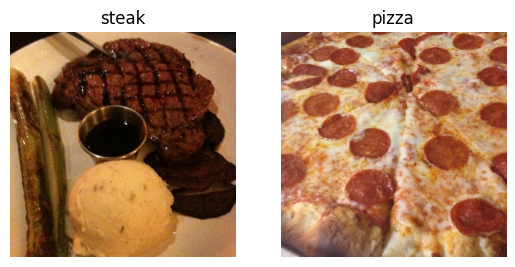

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

In [ ]:
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           class_mode="binary",
                                           batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images,labels=next(train_data)
len(images),len(labels)

(32, 32)

In [ ]:
images[:2],images[0].shape

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [ ]:
labels

array([0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1.],
      dtype=float32)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [ ]:
model4=Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [ ]:
model4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
len(train_data),len(test_data)

(47, 16)

In [ ]:
history4=model4.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data),
                    # callbacks=[tensorboard_callback ]
                    )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 219ms/step - accuracy: 0.6164 - loss: 0.8074 - val_accuracy: 0.8300 - val_loss: 0.3808
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.8409 - loss: 0.3908 - val_accuracy: 0.8560 - val_loss: 0.3645
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - accuracy: 0.9021 - loss: 0.2838 - val_accuracy: 0.8560 - val_loss: 0.3633
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.9697 - loss: 0.1074 - val_accuracy: 0.8040 - val_loss: 0.4665
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - accuracy: 0.9930 - loss: 0.0449 - val_accuracy: 0.8360 - val_loss: 0.4735


In [ ]:
history1

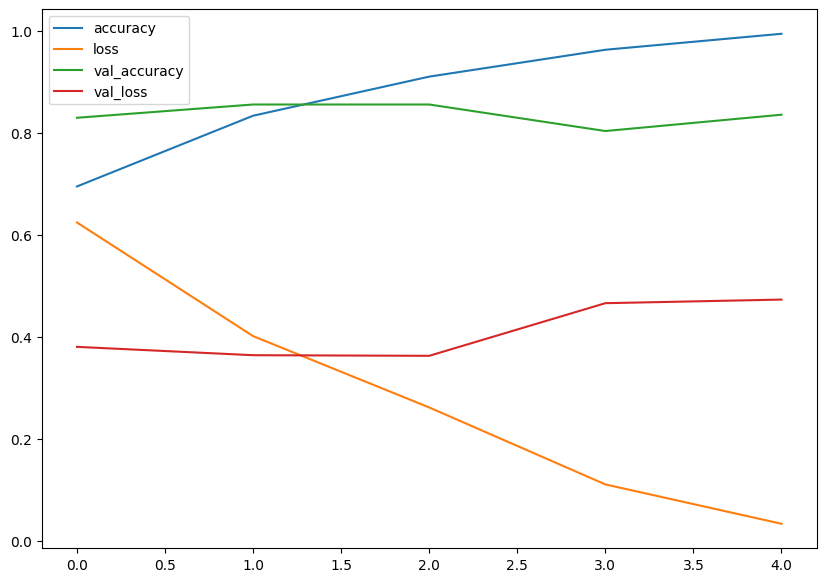

In [ ]:
 import pandas as pd
 pd.DataFrame(history4.history).plot(figsize=(10,7));

In [ ]:
def plot_loss_curves(history):
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]
  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]
  epochs=range(len(history.history["loss"]))

  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()


  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

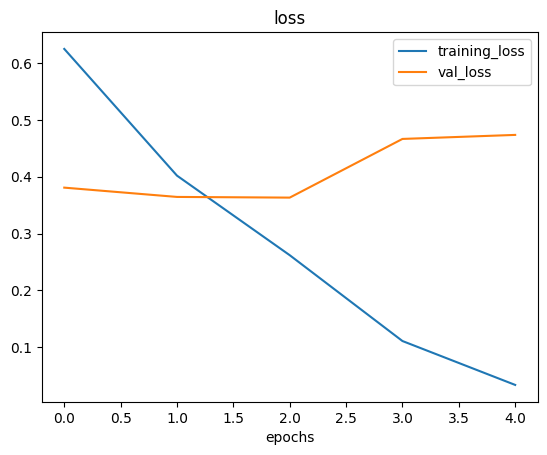

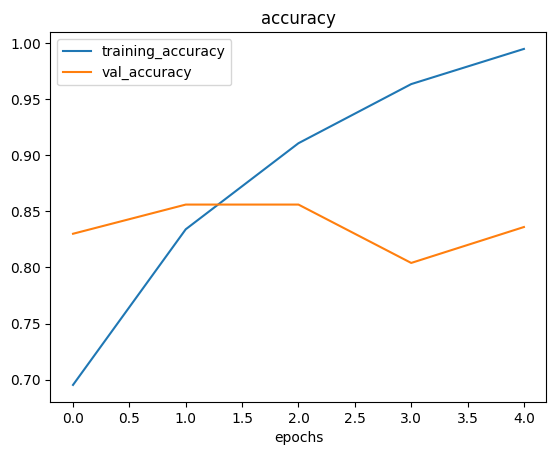

In [ ]:
plot_loss_curves(history=history4)

In [ ]:
tf.random.set_seed(42)
model5=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history5=model5.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(valid_data),

                    )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 180ms/step - accuracy: 0.5870 - loss: 0.6658 - val_accuracy: 0.7800 - val_loss: 0.4962
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 176ms/step - accuracy: 0.7720 - loss: 0.5094 - val_accuracy: 0.8160 - val_loss: 0.3986
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 170ms/step - accuracy: 0.8305 - loss: 0.4310 - val_accuracy: 0.8460 - val_loss: 0.3575
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - accuracy: 0.8360 - loss: 0.3805 - val_accuracy: 0.8580 - val_loss: 0.3392
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step - accuracy: 0.8466 - loss: 0.3781 - val_accuracy: 0.8620 - val_loss: 0.3188


In [ ]:
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,432,025 (5.46 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 954,684 (3.64 MB)

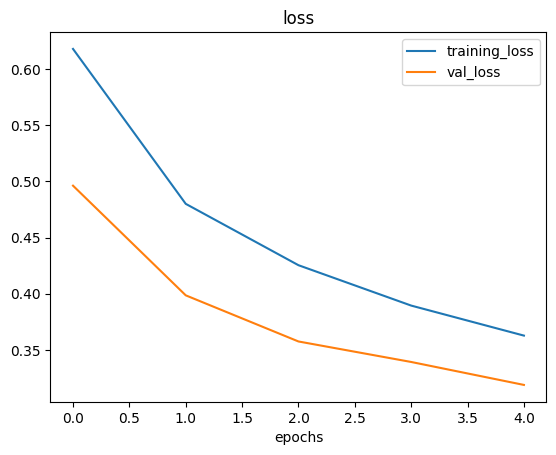

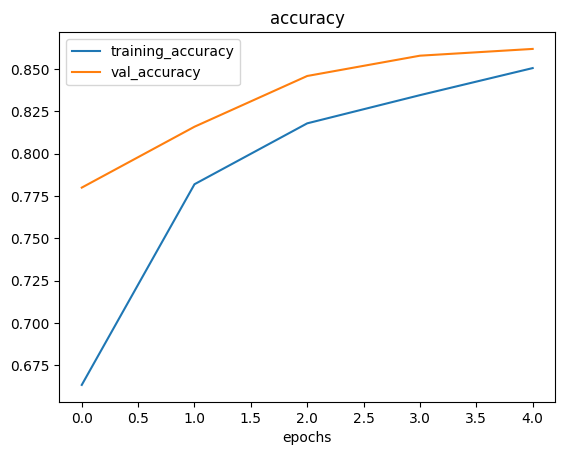

In [ ]:
plot_loss_curves(history5)

In [ ]:
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,

                                           horizontal_flip=True
                                           )

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255. )


In [ ]:
print("Augmented traing data")
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="binary",
                                                                 shuffle=False
                                                                 )
print("Non-augmented traing data")
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False
                                             )


print("Non-augmented test data")
test_data=test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False
                                             )

Augmented traing data
Found 1500 images belonging to 2 classes.
Non-augmented traing data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


In [ ]:
images,labels=next(train_data)
augmented_images,augmented_labels=next(train_data_augmented)

showing image number:10


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

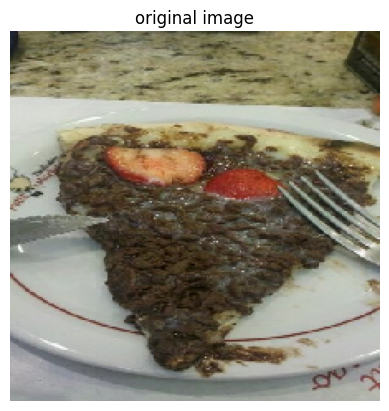

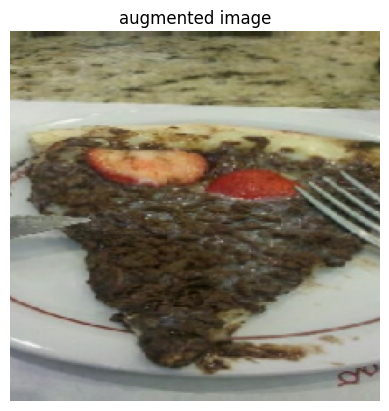

In [ ]:
random_number=random.randint(0,32)
print(f"showing image number:{random_number}")
plt.imshow(images[random_number])
plt.title(f"original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"augmented image")
plt.axis(False)

In [ ]:
print("use augmentented data for model 1 and 4")


use augmentented data for model 1 and 4


In [ ]:
history6=model1.fit(train_data_augmented,
                    epochs=5,
                    steps_per_epoch=len(train_data_augmented),
                    validation_data=test_data,
                    validation_steps=len(valid_data),

                    )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 514ms/step - accuracy: 0.6918 - loss: 0.6464 - val_accuracy: 0.6160 - val_loss: 1.0854
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 520ms/step - accuracy: 0.5807 - loss: 0.8755 - val_accuracy: 0.8100 - val_loss: 0.4853
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 47s 632ms/step - accuracy: 0.7162 - loss: 0.5700 - val_accuracy: 0.8640 - val_loss: 0.3597
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 27s 569ms/step - accuracy: 0.7686 - loss: 0.4850 - val_accuracy: 0.7800 - val_loss: 0.4532
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 507ms/step - accuracy: 0.7529 - loss: 0.5123 - val_accuracy: 0.8740 - val_loss: 0.3209


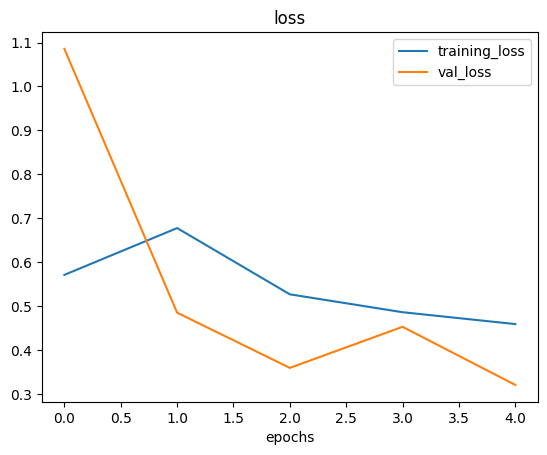

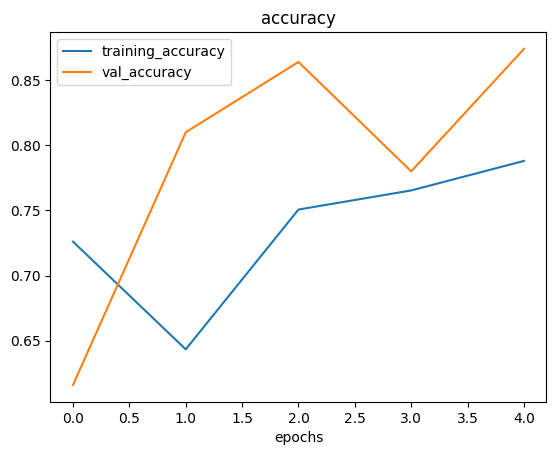

In [ ]:
plot_loss_curves(history6)

In [ ]:
history7=model4.fit(train_data_augmented,
                    epochs=5,
                    steps_per_epoch=len(train_data_augmented),
                    validation_data=test_data,
                    validation_steps=len(valid_data),

                    )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 622ms/step - accuracy: 0.6775 - loss: 1.0325 - val_accuracy: 0.5920 - val_loss: 0.6639
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 607ms/step - accuracy: 0.6090 - loss: 0.6766 - val_accuracy: 0.6800 - val_loss: 0.6373
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 45s 699ms/step - accuracy: 0.7048 - loss: 0.6339 - val_accuracy: 0.7820 - val_loss: 0.5089
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 521ms/step - accuracy: 0.7123 - loss: 0.6012 - val_accuracy: 0.7720 - val_loss: 0.4719
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 507ms/step - accuracy: 0.6923 - loss: 0.6820 - val_accuracy: 0.8040 - val_loss: 0.4583


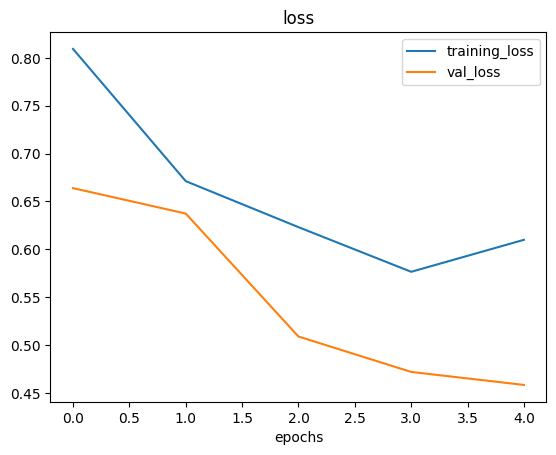

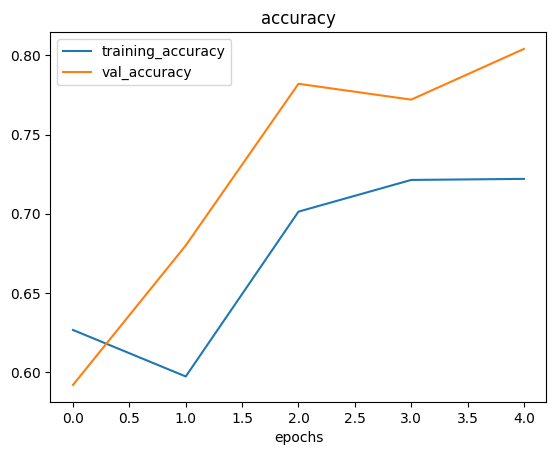

In [ ]:
plot_loss_curves(history7)

In [ ]:
print("Augmented traing data")
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="binary",
                                                                 shuffle=True
                                                                 )

Augmented traing data
Found 1500 images belonging to 2 classes.


In [ ]:
history8=model4.fit(train_data_augmented,
                    epochs=5,
                    steps_per_epoch=len(train_data_augmented),
                    validation_data=test_data,
                    validation_steps=len(valid_data),

                    )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 798ms/step - accuracy: 0.7695 - loss: 0.5015 - val_accuracy: 0.8300 - val_loss: 0.4168
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 605ms/step - accuracy: 0.8114 - loss: 0.4399 - val_accuracy: 0.8460 - val_loss: 0.3845
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 510ms/step - accuracy: 0.8030 - loss: 0.4338 - val_accuracy: 0.8540 - val_loss: 0.3587
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 508ms/step - accuracy: 0.8276 - loss: 0.4085 - val_accuracy: 0.8440 - val_loss: 0.3989
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 745ms/step - accuracy: 0.8228 - loss: 0.4094 - val_accuracy: 0.8040 - val_loss: 0.3884


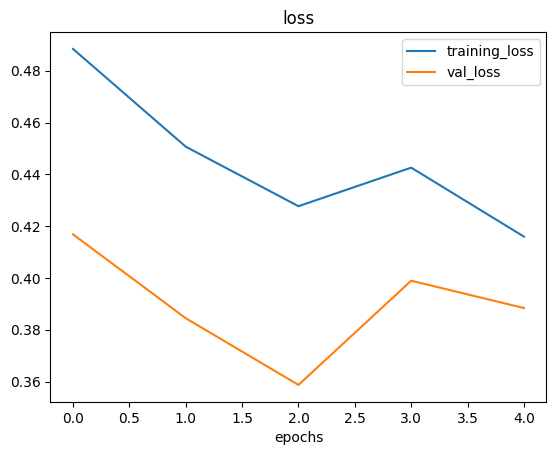

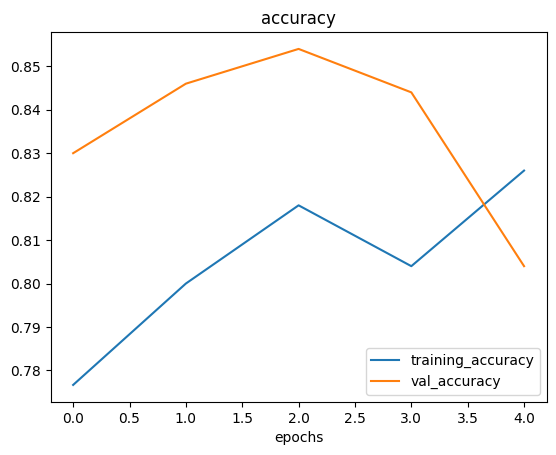

In [ ]:
plot_loss_curves(history8)

In [ ]:
model6=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"
                              ),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])


In [ ]:
model6.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [ ]:
history9=model6.fit(train_data,
                    epochs=20,
                   steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data)
                    )

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 420ms/step - accuracy: 0.4327 - loss: 0.7093 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 170ms/step - accuracy: 0.5294 - loss: 0.6941 - val_accuracy: 0.6340 - val_loss: 0.6929
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 152ms/step - accuracy: 0.4762 - loss: 0.6931 - val_accuracy: 0.5540 - val_loss: 0.6924
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - accuracy: 0.5402 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - accuracy: 0.5032 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.7013
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 166ms/step - accuracy: 0.5065 - loss: 0.7124 - val_accuracy: 0.6940 - val_loss: 0.6593
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 247ms/step - accuracy: 0.6374 - loss: 0.6697 - val_accuracy: 0.6320 - val_loss: 0.6615
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 214ms/step - accuracy: 0.6409 - loss: 0.6311 - val_accuracy

In [ ]:
model6.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 220, 220, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 108, 108, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 106, 106, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 53, 53, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 51, 51, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 49, 49, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 22, 22, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 20, 20, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │         3,201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,501 (806.65 KB)

 Trainable params: 68,833 (268.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 137,668 (537.77 KB)

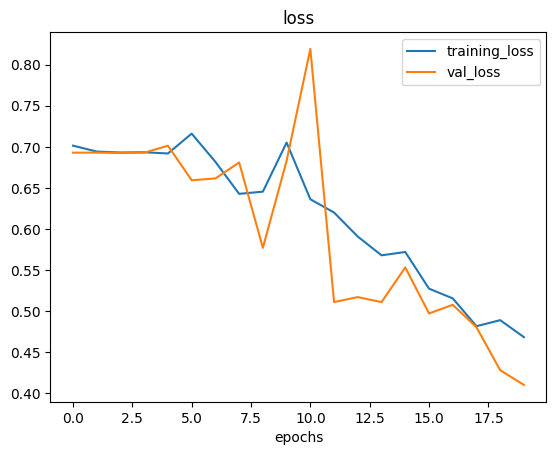

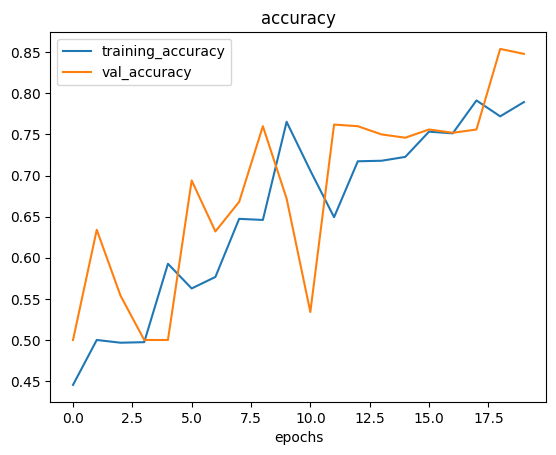

In [ ]:
plot_loss_curves(history9)

rm: cannot remove '03-steak.jpeg*': No such file or directory
--2025-05-15 09:34:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2025-05-15 09:34:40 (65.3 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



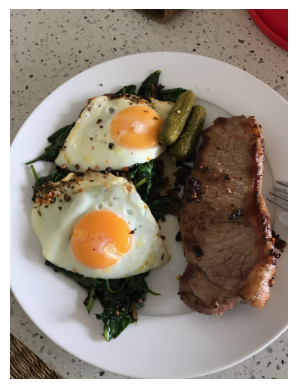

In [ ]:

!rm 03-steak.jpeg*

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)
plt.show()


In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
def load_and_prep_image(filename,img_shape=224):
  img=tf.io.read_file(filename)
  img=tf.image.decode_image(img)
  img=tf.image.resize(img,size=[img_shape,img_shape])
  img=img/255.
  return img

In [ ]:
  steak=load_and_prep_image("03-steak.jpeg")
  steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred=model1.predict(tf.expand_dims(steak,axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[0.8589319]], dtype=float32)

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
pred_class=class_names[int(tf.round(pred))]
pred_class

np.str_('steak')

In [ ]:
def pred_and_plot(model,filename,class_names=class_names):
  img=load_and_prep_image(filename)
  pred=model.predict(tf.expand_dims(img,axis=0))
  pred_class=class_names[int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


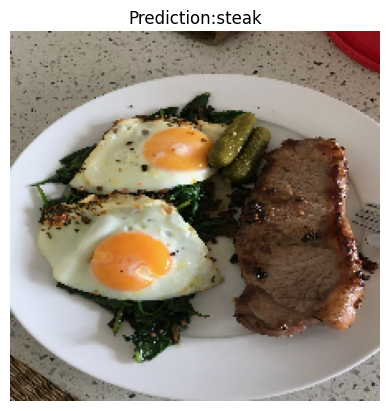

In [ ]:
pred_and_plot(model1,"03-steak.jpeg")

--2025-05-15 10:00:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.03s   

2025-05-15 10:00:20 (99.2 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]



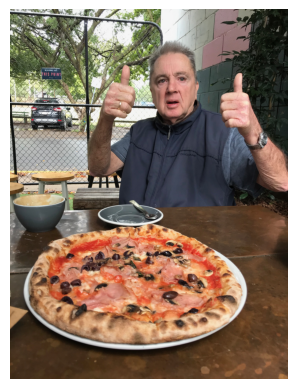

In [ ]:



!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg
pizza = mpimg.imread("03-pizza-dad.jpeg")
plt.imshow(pizza)
plt.axis(False)
plt.show()


In [ ]:
pizza=load_and_prep_image("03-pizza-dad.jpeg")
pizza

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.2887255 , 0.3009804 , 0.2632353 ],
        [0.44705883, 0.47843137, 0.39607844],
        [0.57598037, 0.5955882 , 0.5093137 ],
        ...,
        [0.05686275, 0.06862745, 0.04117647],
        [0.05588235, 0.0754902 , 0.04803922],
        [0.07745098, 0.08921569, 0.06176471]],

       [[0.9377451 , 0.9553922 , 0.9651961 ],
        [0.8838235 , 0.9102941 , 0.92107844],
        [0.9411765 , 0.9607843 , 0.9588235 ],
        ...,
        [0.04313726, 0.05490196, 0.02745098],
        [0.07843138, 0.09019608, 0.0627451 ],
        [0.08186275, 0.10147059, 0.07401961]],

       [[0.12745099, 0.13529412, 0.12352941],
        [0.175     , 0.17450981, 0.16617647],
        [0.12941177, 0.14901961, 0.13333334],
        ...,
        [0.03431373, 0.05196078, 0.0245098 ],
        [0.05833333, 0.07009804, 0.04264706],
        [0.05343137, 0.08088236, 0.0495098 ]],

       ...,

       [[0.24264705, 0.16029412, 0.07794118],
        [0.23

In [ ]:
pred=model1.predict(tf.expand_dims(pizza,axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[0.2873434]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


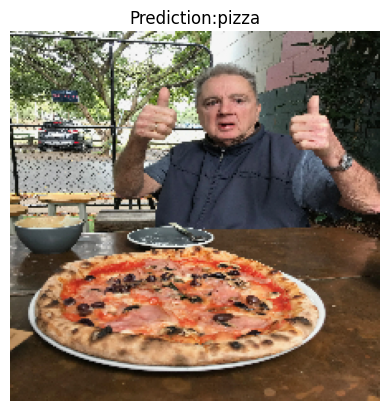

In [ ]:
pred_and_plot(model1,"03-pizza-dad.jpeg")

mv: cannot stat 'Pizza.jpg.2': No such file or directory
--2025-05-15 10:17:04--  https://raw.githubusercontent.com/snehilkumbhani/tensorflow/refs/heads/main/Pizza.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196417 (192K) [image/jpeg]
Saving to: ‘pizza.jpg’

pizza.jpg           100%[===================>] 191.81K  --.-KB/s    in 0.01s   

2025-05-15 10:17:04 (13.3 MB/s) - ‘pizza.jpg’ saved [196417/196417]



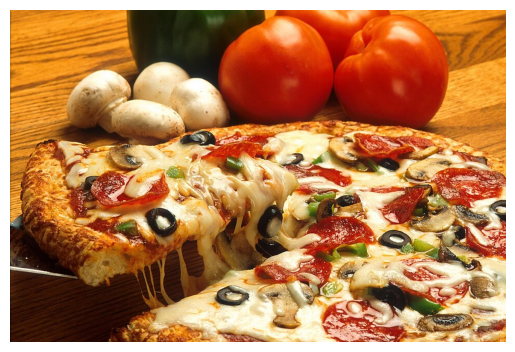

In [ ]:
!mv Pizza.jpg.2 pizza.jpg
!wget https://raw.githubusercontent.com/snehilkumbhani/tensorflow/refs/heads/main/Pizza.jpg -O pizza.jpg


pizza1 = mpimg.imread("pizza.jpg")
plt.imshow(pizza1)
plt.axis(False)
plt.show()


In [ ]:
pizza1=load_and_prep_image("pizza.jpg")
pizza1

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.8565732 , 0.5460922 , 0.1360788 ],
        [0.922399  , 0.5425852 , 0.09745085],
        [0.9084015 , 0.535508  , 0.11033414],
        ...,
        [0.9444697 , 0.5640775 , 0.05401977],
        [0.93912953, 0.5461325 , 0.07610439],
        [0.9140199 , 0.5047763 , 0.0724644 ]],

       [[0.8551089 , 0.5528161 , 0.14545444],
        [0.8997774 , 0.5241472 , 0.0829707 ],
        [0.8699467 , 0.4999187 , 0.07883406],
        ...,
        [0.9575893 , 0.5654324 , 0.08715872],
        [0.9508611 , 0.5650242 , 0.08354162],
        [0.91931164, 0.53662694, 0.06504074]],

       [[0.7586154 , 0.4622568 , 0.06633403],
        [0.87234205, 0.5001138 , 0.06696992],
        [0.85365146, 0.4897859 , 0.07157864],
        ...,
        [0.9369829 , 0.5562931 , 0.07837999],
        [0.9260018 , 0.5605949 , 0.08993106],
        [0.8981818 , 0.5473393 , 0.08563782]],

       ...,

       [[0.1764223 , 0.07000425, 0.03582316],
        [0.23

In [ ]:
pred=model1.predict(tf.expand_dims(pizza1,axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[0.03775308]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


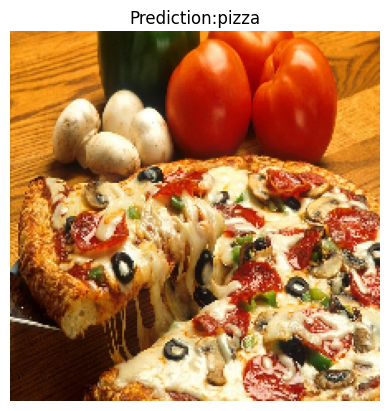

In [ ]:
pred_and_plot(model1,"pizza.jpg")

--2025-05-15 10:18:19--  https://raw.githubusercontent.com/snehilkumbhani/tensorflow/refs/heads/main/steak.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13646 (13K) [image/jpeg]
Saving to: ‘steak.jpg’

steak.jpg           100%[===================>]  13.33K  --.-KB/s    in 0s      

2025-05-15 10:18:20 (86.2 MB/s) - ‘steak.jpg’ saved [13646/13646]



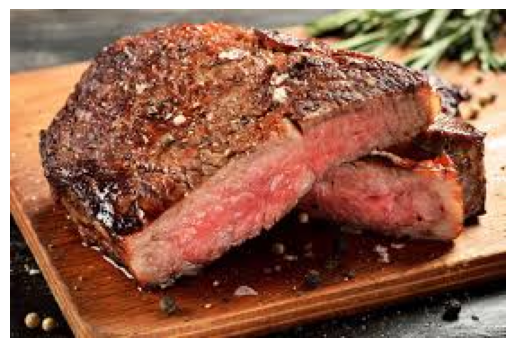

In [ ]:
!wget https://raw.githubusercontent.com/snehilkumbhani/tensorflow/refs/heads/main/steak.jpg


steak1 = mpimg.imread("steak.jpg")
plt.imshow(steak1)
plt.axis(False)
plt.show()


In [ ]:
steak1=load_and_prep_image("steak.jpg")
steak1

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.59562325, 0.54464287, 0.48189774],
        [0.5880602 , 0.5370798 , 0.47433475],
        [0.57811624, 0.52713585, 0.46439075],
        ...,
        [0.09993058, 0.10941928, 0.02808144],
        [0.08371858, 0.09548328, 0.02097348],
        [0.08928557, 0.10105028, 0.02654048]],

       [[0.54692996, 0.49594957, 0.43320447],
        [0.5368522 , 0.48587185, 0.42312676],
        [0.5236062 , 0.47262576, 0.40988067],
        ...,
        [0.0567999 , 0.06390107, 0.00770986],
        [0.04945273, 0.05552766, 0.00575834],
        [0.06805032, 0.07412525, 0.00980141]],

       [[0.52612734, 0.47727412, 0.41452903],
        [0.5124771 , 0.46362382, 0.40087873],
        [0.4953604 , 0.44650713, 0.383762  ],
        ...,
        [0.04081856, 0.03940031, 0.        ],
        [0.03158459, 0.02912485, 0.        ],
        [0.0536323 , 0.05117256, 0.00158615]],

       ...,

       [[0.12188179, 0.11796023, 0.10227396],
        [0.17

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step


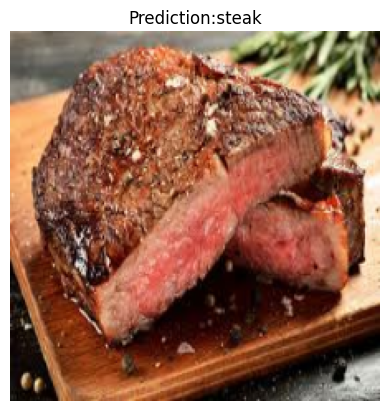

In [ ]:
pred_and_plot(model6,"steak.jpg")